In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


In [16]:
mask_diabetes = diabetes.duplicated()
display(mask_diabetes)

diabet_duplicates = diabetes[mask_diabetes]
display(diabet_duplicates)
print(f'Число найденных дубликатов: {diabet_duplicates.shape[0]}')
display(diabet_duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
773     True
774     True
775     True
776     True
777     True
Length: 778, dtype: bool

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
768,6,98,58,33,190,34.0,0.430,43,0,Female
769,2,112,75,32,0,35.7,0.148,21,0,Female
770,2,108,64,0,0,30.8,0.158,21,0,Female
771,8,107,80,0,0,24.6,0.856,34,0,Female
772,7,136,90,0,0,29.9,0.210,50,0,Female
773,6,103,72,32,190,37.7,0.324,55,0,Female
774,1,71,48,18,76,20.4,0.323,22,0,Female
775,0,117,0,0,0,33.8,0.932,44,0,Female
776,4,154,72,29,126,31.3,0.338,37,0,Female
777,5,147,78,0,0,33.7,0.218,65,0,Female


Число найденных дубликатов: 10


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
768,6,98,58,33,190,34.0,0.430,43,0,Female
769,2,112,75,32,0,35.7,0.148,21,0,Female
770,2,108,64,0,0,30.8,0.158,21,0,Female
771,8,107,80,0,0,24.6,0.856,34,0,Female
772,7,136,90,0,0,29.9,0.210,50,0,Female
773,6,103,72,32,190,37.7,0.324,55,0,Female
774,1,71,48,18,76,20.4,0.323,22,0,Female
775,0,117,0,0,0,33.8,0.932,44,0,Female
776,4,154,72,29,126,31.3,0.338,37,0,Female
777,5,147,78,0,0,33.7,0.218,65,0,Female


In [17]:
diabetes = diabetes.drop_duplicates()
print(f'Результирующее число записей: {diabetes.shape[0]}')

Результирующее число записей: 768


In [18]:
#список неинформативных признаков
low_information_cols_diabet = [] 

#цикл по всем столбцам
for col in diabetes.columns:
    #наибольшая относительная частота в признаке
    top_freq = diabetes[col].value_counts(normalize=True).max()

    #доля уникальных значений от размера признака
    nunique_ratio = diabetes[col].nunique() / diabetes[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.99:
        low_information_cols_diabet.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.99:
        low_information_cols_diabet.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

display(low_information_cols_diabet)

Gender: 100.0% одинаковых значений


['Gender']

In [19]:
diabetes = diabetes.drop(low_information_cols_diabet, axis=1)
print(f'Результирующее число признаков: {diabetes.shape[1]}')
display(diabetes)

Результирующее число признаков: 9


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98,58,33,190,34.0,0.430,43,0
1,2,112,75,32,0,35.7,0.148,21,0
2,2,108,64,0,0,30.8,0.158,21,0
3,8,107,80,0,0,24.6,0.856,34,0
4,7,136,90,0,0,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
763,5,139,64,35,140,28.6,0.411,26,0
764,1,96,122,0,0,22.4,0.207,27,0
765,10,101,86,37,0,45.6,1.136,38,1
766,0,141,0,0,0,42.4,0.205,29,1


In [20]:
display(diabetes.isnull())
cols_null_percent_diabet = diabetes.isnull().mean() * 100
display(cols_null_percent_diabet > 0)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [21]:
list_null_diabetes = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
display(diabetes)
for col in list_null_diabetes:
    diabetes[col] = np.where((diabetes[col] == 0), np.nan, diabetes[col])

display(diabetes)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98,58,33,190,34.0,0.430,43,0
1,2,112,75,32,0,35.7,0.148,21,0
2,2,108,64,0,0,30.8,0.158,21,0
3,8,107,80,0,0,24.6,0.856,34,0
4,7,136,90,0,0,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
763,5,139,64,35,140,28.6,0.411,26,0
764,1,96,122,0,0,22.4,0.207,27,0
765,10,101,86,37,0,45.6,1.136,38,1
766,0,141,0,0,0,42.4,0.205,29,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,190.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,NaN,35.7,0.148,21,0
2,2,108.0,64.0,NaN,NaN,30.8,0.158,21,0
3,8,107.0,80.0,NaN,NaN,24.6,0.856,34,0
4,7,136.0,90.0,NaN,NaN,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
763,5,139.0,64.0,35.0,140.0,28.6,0.411,26,0
764,1,96.0,122.0,NaN,NaN,22.4,0.207,27,0
765,10,101.0,86.0,37.0,NaN,45.6,1.136,38,1
766,0,141.0,NaN,NaN,NaN,42.4,0.205,29,1


In [22]:
# combine_data_diabet = diabetes.copy()
n1 = diabetes.shape[0] #число строк в таблице
display(n1)
thresh = n1*0.7
diabetes = diabetes.dropna(how='any', thresh=thresh, axis=1)
# display(diabetes)
display(diabetes.shape)

768

(768, 8)

In [26]:
m = diabetes.shape[1] #число признаков после удаления столбцов
display(m)
diabetes = diabetes.dropna(how='any', thresh=m-2, axis=0)
display(diabetes.shape)
display(diabetes.columns)

8

(761, 8)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### В оставшихся записях замените пропуски на медиану. Чему равно среднее значение в столбце SkinThickness? Ответ округлите до десятых.

In [32]:
values = {
    'Pregnancies': diabetes['Pregnancies'],
    'Glucose': diabetes['Glucose'].median(),
    'BloodPressure': diabetes['BloodPressure'].median(),
    'SkinThickness': diabetes['SkinThickness'].median(),
    'BMI': diabetes['BMI'].median(),
    'DiabetesPedigreeFunction': diabetes['DiabetesPedigreeFunction'].median(),
    'Age': diabetes['Age'].median(),
    'Outcome': diabetes['Outcome'].median()
}
#заполняем пропуски в соответствии с заявленным словарем
diabetes = diabetes.fillna(values)
#выводим результирующую долю пропусков
diabetes.isnull().mean()
display(diabetes['SkinThickness'].mean())

29.109067017082786

### Сколько выбросов найдёт классический метод межквартильного размаха в признаке SkinThickness?

In [33]:
def outliers_iqr_mod(data, feature, left = 1.5, right = 1.5):
    """
    Давайте немного модифицируем нашу функцию outliers_iqr(). 
    Добавьте в нее параметры left и right, которые задают число IQR влево и вправо от границ ящика (пусть по умолчанию они равны 1.5).
    Функция, как и раньше должна возвращать потенциальные выбросы и очищенный DataFrame.
    """

    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [35]:
outliers, cleaned = outliers_iqr_mod(diabetes, 'SkinThickness', left = 1.5, right = 1.5)
display(outliers.shape[0])

87

### Сколько выбросов найдёт классический метод z-отклонения в признаке SkinThickness?

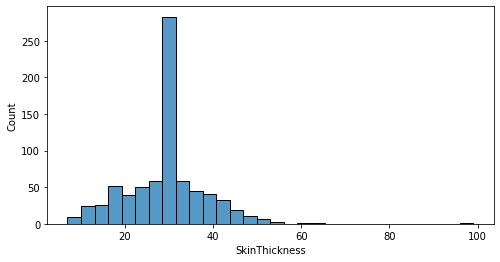

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
# log_mkad_km = np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(diabetes['SkinThickness'], bins=30, ax=ax)

In [38]:
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    """
    Давайте расширим правило 3ех сигм, чтобы иметь возможность учитывать особенности данных.
    Добавьте в функцию outliers_z_score() параметры left и right, которые будут задавать число сигм (стандартных отклонений) 
    влево и вправо соответственно, которые определяют границы метода z-отклонения. 
    По умолчанию оба параметры равны 3
    """
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned




In [40]:
outliers, cleaned = outliers_z_score_mod(diabetes , 'SkinThickness', log_scale=False, left=3, right=3)

display(outliers.shape[0])

4

In [42]:
outliers, cleaned = outliers_iqr_mod(diabetes, 'DiabetesPedigreeFunction', left = 1.5, right = 1.5)
display(outliers.shape[0])

29

In [47]:
def outliers_z_score_mod_v1(data, feature, log_scale=False, left=3, right=3, zero=0):
    """
    Давайте расширим правило 3ех сигм, чтобы иметь возможность учитывать особенности данных.
    Добавьте в функцию outliers_z_score() параметры left и right, которые будут задавать число сигм (стандартных отклонений) 
    влево и вправо соответственно, которые определяют границы метода z-отклонения. 
    По умолчанию оба параметры равны 3
    """
    if log_scale:
        x = np.log(data[feature] + 1 * zero)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [48]:
outliers, cleaned =  outliers_z_score_mod_v1(diabetes , 'DiabetesPedigreeFunction', log_scale=True, left=3, right=3)
display(outliers.shape[0])

0